
## Data Exploration
For Questions 1-15, use the "[Fox News.csv](https://drive.google.com/file/d/1gxe-TRDulaQH4QFyXMBNU_zjBNUv37M4/view?usp=sharing)" file.

###Questions

In [ ]:


import pandas as pd
Path = '/content/Fox News.csv'
df = pd.read_csv(Path)
df.shape

#1
shape_info = df.shape
print(f"1. How many rows and columns are there? The dataset contains {shape_info[0]} rows and {shape_info[1]} columns.")

#2
link_posts = df[df['status_type'] == 'link'].shape[0]
print(f"2. How many posts are there where status_type == 'link'? There are {link_posts} posts where status_type == 'link'.")

#3
video_shares_over_500 = df[(df['status_type'] == 'video') & (df['num_shares'] > 500)].shape[0]
print(f"4. How many posts are there where status_type == 'video' and number of shares is more than 500? There are {video_shares_over_500} posts.")

#4
comments_over_2000 = df[df['num_comments'] >= 2000].shape[0]
print(f"5. How many posts are there where number of comments is at least 2000? There are {comments_over_2000} posts.")

(5988, 16)

5. What is the maximum, average and minimum num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas, num_sads,num_angrys per post? [3]


In [ ]:

columns = ['num_reactions', 'num_comments', 'num_shares',
           'num_likes', 'num_loves', 'num_wows', 'num_hahas',
           'num_sads', 'num_angrys']

maximum = df[columns].max()
average = df[columns].mean()
minimum = df[columns].min()


(maximum, average, minimum)

(num_reactions    1225905
 num_comments      438715
 num_shares        738972
 num_likes        1071289
 num_loves         205638
 num_wows           16271
 num_hahas         105824
 num_sads          100624
 num_angrys         90671
 dtype: int64,
 num_reactions    28839.588343
 num_comments      6033.031229
 num_shares        7759.162993
 num_likes        21806.842518
 num_loves         2441.752505
 num_wows           517.209419
 num_hahas         1170.851536
 num_sads           655.683701
 num_angrys        2247.263193
 dtype: float64,
 num_reactions    3
 num_comments     0
 num_shares       0
 num_likes        2
 num_loves        0
 num_wows         0
 num_hahas        0
 num_sads         0
 num_angrys       0
 dtype: int64)

 6. Draw histograms for num_reactions, num_comments, num_shares.


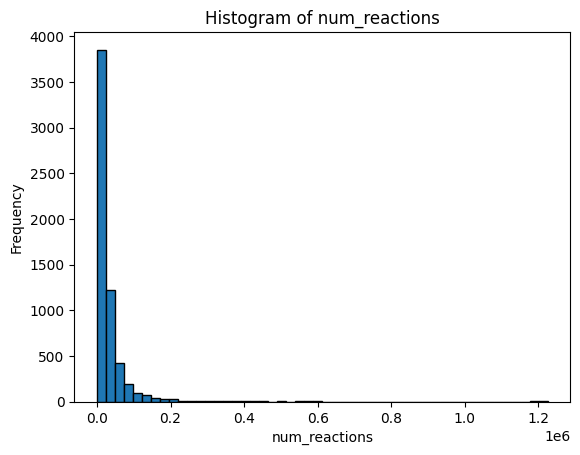

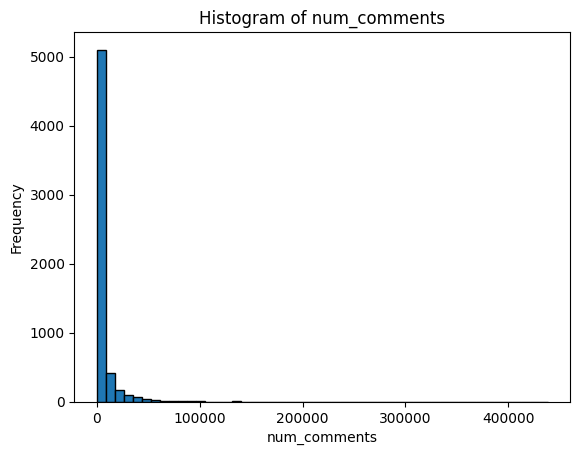

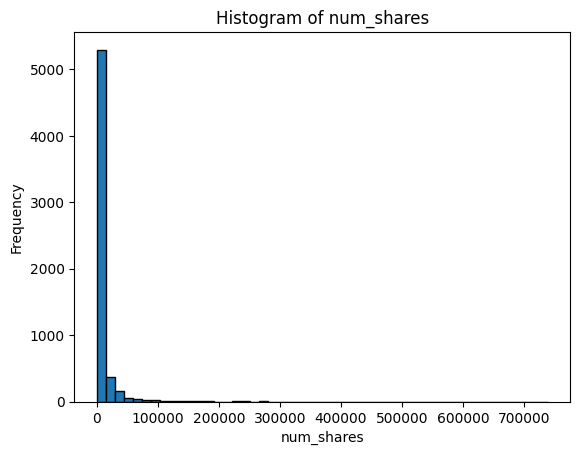

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

columns = ['num_reactions', 'num_comments', 'num_shares']

for column in columns:
    plt.figure()
    plt.hist(df[column].dropna(), edgecolor='k', bins=50)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

7. Draw scatterplots for each pair of combination of num_reactions, num_comments, num_shares. Do you observe any possible correlation between any pair? If yes, what are the nature (positive, negative) of those correlation?

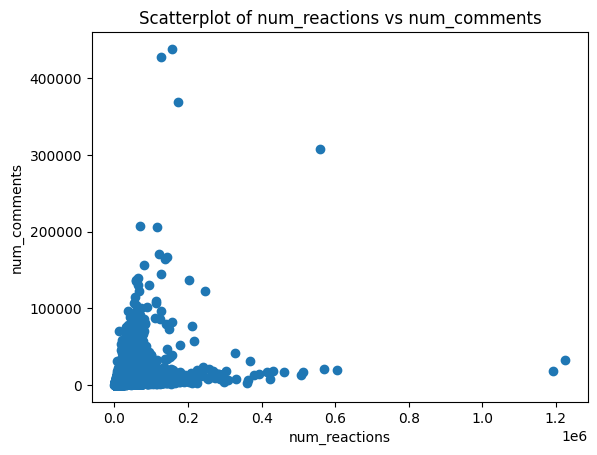

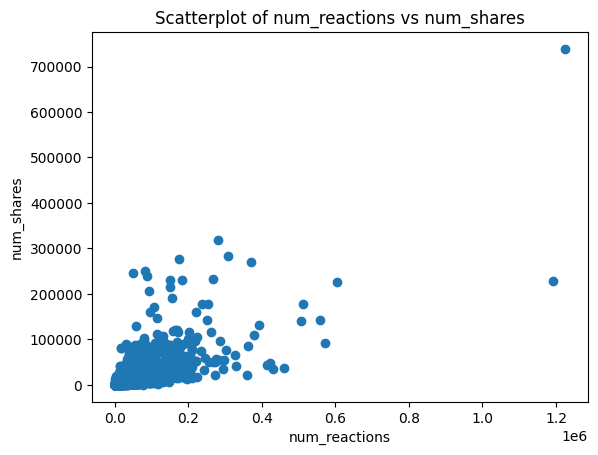

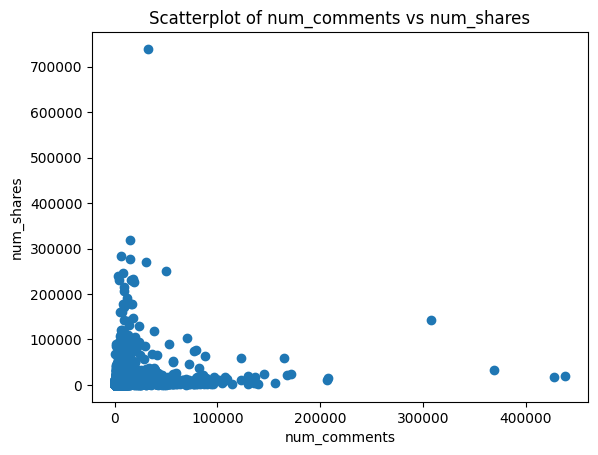

In [ ]:


plt.figure()
plt.scatter(df['num_reactions'], df['num_comments'])
plt.title('num_reactions vs num_comments')
plt.xlabel('num_reactions')
plt.ylabel('num_comments')
plt.show()

plt.figure()
plt.scatter(df['num_reactions'], df['num_shares'])
plt.title('num_reactions vs num_shares')
plt.xlabel('num_reactions')
plt.ylabel('num_shares')
plt.show()

plt.figure()
plt.scatter(df['num_comments'], df['num_shares'])
plt.title('num_comments vs num_shares')
plt.xlabel('num_comments')
plt.ylabel('num_shares')
plt.show()

# There seems to be a somewhat of a positive correlation betwen num_reactions and num_shares. Other pairs don't have a correlation


8. How many posts are there of different status_types?

In [ ]:
df.groupby('status_type')['status_id'].count()


,status_id
status_type,
link,2666
photo,1119
status,107
video,2096


9. What is the average num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas, num_sads,num_angrys per post for each status_type?

In [ ]:


columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

df.groupby('status_type')[columns].mean()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,,
link,22756.288072,3755.145911,5767.823331,15631.768942,1429.374344,720.457239,1571.011253,791.798950,2611.887097
photo,43869.427167,3394.005362,9837.350313,38057.025022,3221.058981,273.522788,897.140304,551.019660,869.701519
status,8509.532710,1135.205607,2260.401869,5509.074766,435.897196,474.205607,134.598131,964.654206,991.112150
video,29591.021947,10589.319179,9463.260019,21817.650286,3415.790076,390.982347,860.897424,522.656966,2583.051527


10. Find the posts which are shared the most, or commented on the most, or received maximum number of reactions.


In [ ]:

shared = df[df['num_shares'] == df['num_shares'].max()]

commented = df[df['num_comments'] == df['num_comments'].max()]

reactions = df[df['num_reactions'] == df['num_reactions'].max()]

print("Most shares:")
print(shared)

print("Most comments:")
print(commented)

print("Most reactions:")
print(reactions)




Most shares:
                          status_id  \
4711  15704546335_10154593929716336   

                                         status_message link_name status_type  \
4711  In an incredible show of support, a high schoo...       NaN       video   

                                            status_link  \
4711  https://www.facebook.com/FoxNews/videos/101545...   

                                          permalink_url     status_published  \
4711  https://www.facebook.com/FoxNews/videos/101545...  2016-09-08 08:04:39   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
4711        1225905         32190      738972    1006638     205638     10903   

      num_hahas  num_sads  num_angrys  
4711        394      2289          43  
Most comments:
                          status_id  \
3767  15704546335_10154681045361336   

                                         status_message link_name status_type  \
3767  Donald J. Trump and Hillary Clinton face 

 11. Find the link type posts where the number of angry is higher than the average number of angry for a link type post.Store the result in a dataframe named 'angry_posts'.

In [ ]:

average = df[df['status_type'] == 'link']['num_angrys'].mean()

angry_posts = df[(df['status_type'] == 'link') & (df['num_angrys'] > average)]

(angry_posts)


,status_id,status_message,link_name,status_type,status_link,permalink_url,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6,15704546335_10155057757696336,"""Thank goodness this Brooklyn federal judge ha...",Sen. Durbin: Trump's 'Impulsive' Immigration O...,link,http://insider.foxnews.com/2017/01/29/dick-dur...,https://www.facebook.com/FoxNews/posts/1015505...,2017-01-29 14:48:00,5666,5694,350,1494,100,91,984,81,2916
26,15704546335_10155054937346336,The Colorado secret service agent who allegedl...,USSS Agent on Paid Leave After Saying She Woul...,link,http://insider.foxnews.com/2017/01/28/secret-s...,https://www.facebook.com/FoxNews/posts/1015505...,2017-01-28 22:55:00,57679,26744,7664,36412,1586,1296,6815,448,11125
38,15704546335_10155054605901336,CAIR's national litigation director said that ...,CAIR Planning Lawsuit Against Trump Over Immig...,link,http://insider.foxnews.com/2017/01/28/cair-pla...,https://www.facebook.com/FoxNews/posts/1015505...,2017-01-28 16:40:01,17778,10414,1956,4645,301,250,8447,121,4014
49,15704546335_10155052997366336,"""Can you hear me?"" Police in several states ar...",'Can You Hear Me?' Scam Has Police Urging Peop...,link,http://www.foxnews.com/tech/2017/01/27/can-hea...,https://www.facebook.com/FoxNews/posts/1015505...,2017-01-28 08:00:05,15748,1269,40290,9921,37,2317,52,138,3283
50,15704546335_10155053171036336,ICYMI: A Texas high school art teacher has bee...,"""Die!"" High school teacher stages mock assassi...",link,http://www.foxnews.com/opinion/2017/01/26/die-...,https://www.facebook.com/FoxNews/posts/1015505...,2017-01-28 07:01:00,10817,3201,2423,5511,237,620,946,254,3249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,15704546335_10154482312176336,A moment of silence for fallen police officers...,Shouts of 'Black Lives Matter' Interrupt Momen...,link,http://insider.foxnews.com/2016/07/28/black-li...,https://www.facebook.com/FoxNews/posts/1015448...,2016-07-28 20:40:23,65679,14302,55144,13081,226,1340,345,8695,41992
5923,15704546335_10154481314521336,A man caught on video tearing down Blue Lives ...,NY Man Caught Tearing Down Blue Lives Matter R...,link,http://www.foxnews.com/us/2016/07/28/man-caugh...,https://www.facebook.com/FoxNews/posts/1015448...,2016-07-28 13:18:25,9221,3672,1670,3781,41,177,1710,131,3381
5931,15704546335_10154476320051336,"When the couple confronted their grandson, he ...",Elderly Couple Scammed Out of Their Home by Gr...,link,http://insider.foxnews.com/2016/07/26/elderly-...,https://www.facebook.com/FoxNews/posts/1015447...,2016-07-28 07:22:16,11586,1602,6126,2209,29,276,17,3517,5538
5959,15704546335_10154478757381336,Charles Allen Judge Jr. and Jonathon Michael P...,Two South Carolina Soldiers Gunned Down While ...,link,http://www.foxnews.com/us/2016/07/27/two-south...,https://www.facebook.com/FoxNews/posts/1015447...,2016-07-27 14:07:05,12962,788,2016,3051,36,100,12,6529,3234


12. Find the average number of loves and average number of likes for the 'angry_posts'


In [ ]:

averageLoves = angry_posts['num_loves'].mean()
averageLikes = angry_posts['num_likes'].mean()

(averageLoves, averageLikes)

(368.628664495114, 9965.255700325733)

13. Find the posts from 'angry_posts' where the num_likes is less than the average likes and num_loves is less than then average loves that you found in Question 13.

In [ ]:
angry_posts[(angry_posts['num_likes'] < averageLikes) & (angry_posts['num_loves'] < averageLoves)]


,status_id,status_message,link_name,status_type,status_link,permalink_url,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6,15704546335_10155057757696336,"""Thank goodness this Brooklyn federal judge ha...",Sen. Durbin: Trump's 'Impulsive' Immigration O...,link,http://insider.foxnews.com/2017/01/29/dick-dur...,https://www.facebook.com/FoxNews/posts/1015505...,2017-01-29 14:48:00,5666,5694,350,1494,100,91,984,81,2916
38,15704546335_10155054605901336,CAIR's national litigation director said that ...,CAIR Planning Lawsuit Against Trump Over Immig...,link,http://insider.foxnews.com/2017/01/28/cair-pla...,https://www.facebook.com/FoxNews/posts/1015505...,2017-01-28 16:40:01,17778,10414,1956,4645,301,250,8447,121,4014
49,15704546335_10155052997366336,"""Can you hear me?"" Police in several states ar...",'Can You Hear Me?' Scam Has Police Urging Peop...,link,http://www.foxnews.com/tech/2017/01/27/can-hea...,https://www.facebook.com/FoxNews/posts/1015505...,2017-01-28 08:00:05,15748,1269,40290,9921,37,2317,52,138,3283
50,15704546335_10155053171036336,ICYMI: A Texas high school art teacher has bee...,"""Die!"" High school teacher stages mock assassi...",link,http://www.foxnews.com/opinion/2017/01/26/die-...,https://www.facebook.com/FoxNews/posts/1015505...,2017-01-28 07:01:00,10817,3201,2423,5511,237,620,946,254,3249
53,15704546335_10155051640726336,The U.S. Army veteran was invited to the game ...,Army Vet Says Rapper Gucci Mane Booted Him fro...,link,http://www.foxnews.com/entertainment/2017/01/2...,https://www.facebook.com/FoxNews/posts/1015505...,2017-01-28 04:00:00,27419,4412,4724,4165,91,2123,182,937,19921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5882,15704546335_10154484279956336,A federal appeals court has struck down a Nort...,Federal Appeals Court Blocks North Carolina Vo...,link,http://www.foxnews.com/politics/2016/07/29/fed...,https://www.facebook.com/FoxNews/posts/1015448...,2016-07-29 15:22:14,9201,6768,3165,1779,87,611,72,206,6446
5900,15704546335_10154481718416336,Authorities said the uniformed officer was sta...,Virginia Police Officer Denied Service at Rest...,link,http://www.foxnews.com/us/2016/07/28/virginia-...,https://www.facebook.com/FoxNews/posts/1015448...,2016-07-29 02:15:00,26915,7559,7626,5275,94,804,137,2851,17754
5923,15704546335_10154481314521336,A man caught on video tearing down Blue Lives ...,NY Man Caught Tearing Down Blue Lives Matter R...,link,http://www.foxnews.com/us/2016/07/28/man-caugh...,https://www.facebook.com/FoxNews/posts/1015448...,2016-07-28 13:18:25,9221,3672,1670,3781,41,177,1710,131,3381
5931,15704546335_10154476320051336,"When the couple confronted their grandson, he ...",Elderly Couple Scammed Out of Their Home by Gr...,link,http://insider.foxnews.com/2016/07/26/elderly-...,https://www.facebook.com/FoxNews/posts/1015447...,2016-07-28 07:22:16,11586,1602,6126,2209,29,276,17,3517,5538


# 14. Explain why these posts received so much anger.

It mostly has to do with the fact that they are controverial posts. If it controversial, the more likely people are to be angry at it. Most of the links seem to be talking about politics as well which is a very touchy subject, usually a controverial topic.


##Hypothesis Testing

A survey found that 58% of 1500 respondents think climate change is a major issue. In 2015, 55% of people believed this. Write a Python function to conduct a one-sided Z-test to check if the proportion has increased.

In [ ]:
from math import sqrt
from scipy.stats import norm

def proportionIncrease(p0, p_hat, n):
    z = (p_hat - p0) / sqrt((p0 * (1 - p0)) / n)
    p_value = 1 - norm.cdf(z)
    return z, p_value

p0 = 0.55
p_hat = 0.58
n = 1500

zStatistic, pValue = proportionIncrease(p0, p_hat, n)

(zStatistic, pValue)



(2.335496832484562, 0.009758740591089055)

Given the IMDB movie dataset that we used, do "Action" movies have a significantly different metascore than "non-Action" movies?

In [ ]:

import pandas as pd
from scipy.stats import ttest_ind

path2 = '/content/IMDB_top_10000_07132023.csv'
df2 = pd.read_csv(path2)

action_movies = df2[df2['Genres'].str.contains('Action', case=False, na=False)]
non_action_movies = df2[~df2['Genres'].str.contains('Action', case=False, na=False)]

action_metascores = action_movies['Metascore'].dropna()
non_action_metascores = non_action_movies['Metascore'].dropna()

tStat, pValue2 = ttest_ind(action_metascores, non_action_metascores, equal_var=False)

(tStat, pValue2)



#Yes, "Action" movies have a significantly different metascore than "non-Action" movies

(-16.740929379115613, 1.247774568510092e-60)

For a dataset, the Z-test yielded a confidence interval of [2.1, 3.5]. What does this interval tell you about the population parameter, and how would you report it in the context of hypothesis testing? [3]

This interval tells me that we're 95% confident that the population parameter is between 2.1 and 3.5